In [6]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                

In [11]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [53]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [34]:
class_names=['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog',
 'Australian cattle dog',
 'Australian shepherd',
 'Australian terrier',
 'Basenji',
 'Basset hound',
 'Beagle',
 'Bearded collie',
 'Beauceron',
 'Bedlington terrier',
 'Belgian malinois',
 'Belgian sheepdog',
 'Belgian tervuren',
 'Bernese mountain dog',
 'Bichon frise',
 'Black and tan coonhound',
 'Black russian terrier',
 'Bloodhound',
 'Bluetick coonhound',
 'Border collie',
 'Border terrier',
 'Borzoi',
 'Boston terrier',
 'Bouvier des flandres',
 'Boxer',
 'Boykin spaniel',
 'Briard',
 'Brittany',
 'Brussels griffon',
 'Bull terrier',
 'Bulldog',
 'Bullmastiff',
 'Cairn terrier',
 'Canaan dog',
 'Cane corso',
 'Cardigan welsh corgi',
 'Cavalier king charles spaniel',
 'Chesapeake bay retriever',
 'Chihuahua',
 'Chinese crested',
 'Chinese shar-pei',
 'Chow chow',
 'Clumber spaniel',
 'Cocker spaniel',
 'Collie',
 'Curly-coated retriever',
 'Dachshund',
 'Dalmatian',
 'Dandie dinmont terrier',
 'Doberman pinscher',
 'Dogue de bordeaux',
 'English cocker spaniel',
 'English setter',
 'English springer spaniel',
 'English toy spaniel',
 'Entlebucher mountain dog',
 'Field spaniel',
 'Finnish spitz',
 'Flat-coated retriever',
 'French bulldog',
 'German pinscher',
 'German shepherd dog',
 'German shorthaired pointer',
 'German wirehaired pointer',
 'Giant schnauzer',
 'Glen of imaal terrier',
 'Golden retriever',
 'Gordon setter',
 'Great dane',
 'Great pyrenees',
 'Greater swiss mountain dog',
 'Greyhound',
 'Havanese',
 'Ibizan hound',
 'Icelandic sheepdog',
 'Irish red and white setter',
 'Irish setter',
 'Irish terrier',
 'Irish water spaniel',
 'Irish wolfhound',
 'Italian greyhound',
 'Japanese chin',
 'Keeshond',
 'Kerry blue terrier',
 'Komondor',
 'Kuvasz',
 'Labrador retriever',
 'Lakeland terrier',
 'Leonberger',
 'Lhasa apso',
 'Lowchen',
 'Maltese',
 'Manchester terrier',
 'Mastiff',
 'Miniature schnauzer',
 'Neapolitan mastiff',
 'Newfoundland',
 'Norfolk terrier',
 'Norwegian buhund',
 'Norwegian elkhound',
 'Norwegian lundehund',
 'Norwich terrier',
 'Nova scotia duck tolling retriever',
 'Old english sheepdog',
 'Otterhound',
 'Papillon',
 'Parson russell terrier',
 'Pekingese',
 'Pembroke welsh corgi',
 'Petit basset griffon vendeen',
 'Pharaoh hound',
 'Plott',
 'Pointer',
 'Pomeranian',
 'Poodle',
 'Portuguese water dog',
 'Saint bernard',
 'Silky terrier',
 'Smooth fox terrier',
 'Tibetan mastiff',
 'Welsh springer spaniel',
 'Wirehaired pointing griffon',
 'Xoloitzcuintli',
 'Yorkshire terrier']

In [35]:
import pickle
with open('model.pkl', 'rb') as f:
    model_transfer = pickle.load(f)

In [36]:
import torch
import torchvision.models as models

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("cuda available? {0}".format(use_cuda))

cuda available? False


In [37]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()


c:\Users\prasa\Desktop\Kutta\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\prasa\Desktop\Kutta\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [45]:
standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

In [46]:
from PIL import Image
import torchvision.transforms as transforms

def load_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    # resize to (244, 244) because VGG16 accept this shape
    in_transform = transforms.Compose([
                        transforms.Resize(size=(244, 244)),
                        transforms.ToTensor()]) # normalizaiton parameters from pytorch doc.

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [47]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = VGG16(img)
    return torch.max(ret,1)[1].item() # predicted class index

In [48]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx = VGG16_predict(img_path)
    return idx >= 151 and idx <= 268 # true/false

In [49]:
from PIL import Image
import torchvision.transforms as transforms

def load_input_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [50]:
def predict_breed_transfer(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

In [54]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(model_transfer, class_names, img_path)
        print("Dogs Detected!\nIt looks like a {0}".format(prediction))  
    # elif face_detector(img_path) > 0:
    #     prediction = predict_breed_transfer(model_transfer, class_names, img_path)
    #     print("Hello, human!\nIf you were a dog..You may look like a {0}".format(prediction))
    else:
        print("Error! Can't detect anything..")

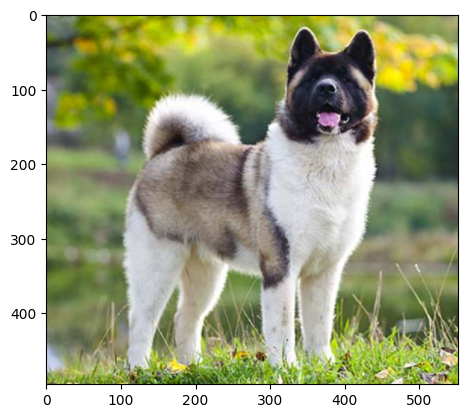

Dogs Detected!
It looks like a Akita


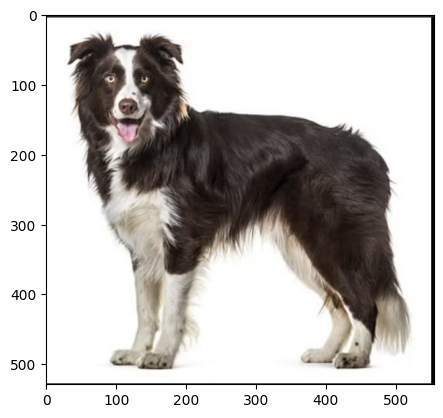

Dogs Detected!
It looks like a Border collie


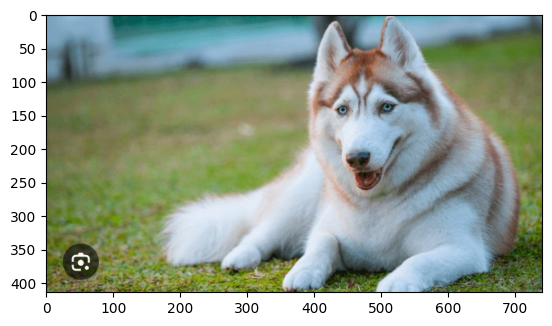

Dogs Detected!
It looks like a Alaskan malamute


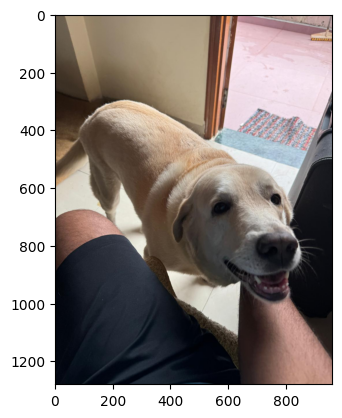

Dogs Detected!
It looks like a Labrador retriever


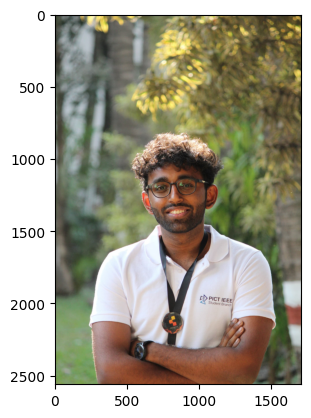

Error! Can't detect anything..


In [55]:
import os
import matplotlib.pyplot as plt
for img_file in os.listdir('C:/Users/prasa/Desktop/testing/'):
    img_path = os.path.join('C:/Users/prasa/Desktop/testing/', img_file)
    run_app(img_path)